# Modeling Slippage: Generating Random Slippage Values

# 1 - Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_ta as ta
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm.notebook import tqdm

In [2]:
df = yf.download("EURUSD=X", period="max", interval="1d", auto_adjust=True)
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0
2003-12-02,1.208897,1.210903,1.194600,1.196101,0
2003-12-03,1.212298,1.213003,1.207700,1.209000,0
2003-12-04,1.208094,1.214403,1.204398,1.212004,0
2003-12-05,1.218695,1.219096,1.206593,1.207802,0
...,...,...,...,...,...
2026-02-03,1.179871,1.182452,1.178078,1.179913,0
2026-02-04,1.181614,1.183852,1.179231,1.181628,0
2026-02-05,1.180164,1.182047,1.178051,1.180233,0


# 2 - Visualizing price chart

In [3]:
start_index = 0
num_rows = 100

df_subset = df.iloc[start_index:start_index + num_rows].copy()

fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Candlestick(
        x=df_subset.index,
        open=df_subset['Open'],
        high=df_subset['High'],
        low=df_subset['Low'],
        close=df_subset['Close'],
        name='Price'
    ),
    row=1, col=1
)

# 3 - Visualizing the Closing price

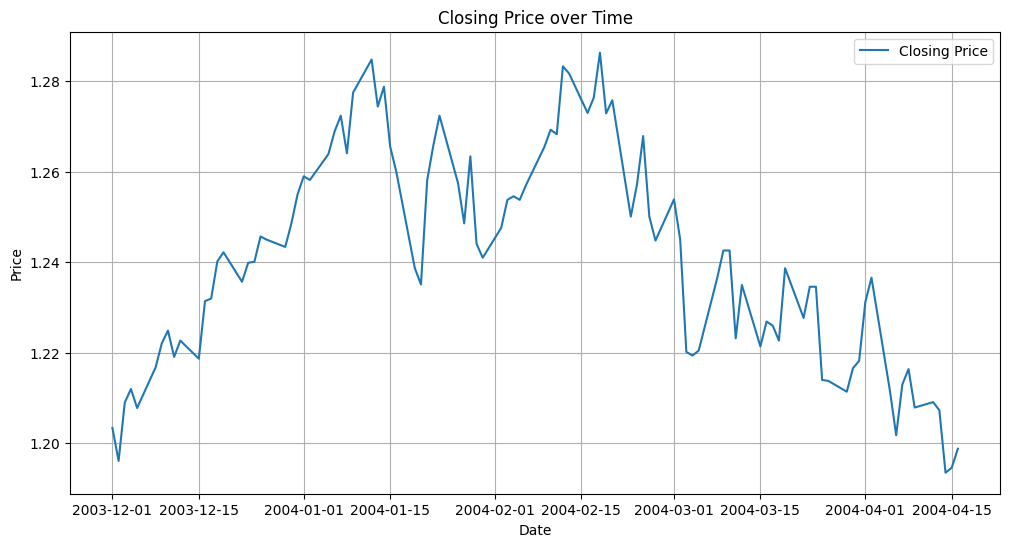

In [4]:
start_index = 0
num_rows = 100
df_subset = df.iloc[start_index:start_index + num_rows].copy()

plt.figure(figsize=(12, 6))
plt.plot(df_subset.index, df_subset['Close'], label='Closing Price')
plt.title('Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# 4 - Adding random noise / blur to Closing price

In [5]:
# df['Closing_Noise'] = np.random.normal(df['Close'], df['Close'] * 0.001, len(df))
df['Closing_Noise'] = np.random.normal(df['Close'], 0.001, len(df))

In [6]:
df

,Open,High,Low,Close,Volume,Closing_Noise
Date,,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0,1.204109
2003-12-02,1.208897,1.210903,1.194600,1.196101,0,1.196821
2003-12-03,1.212298,1.213003,1.207700,1.209000,0,1.209591
2003-12-04,1.208094,1.214403,1.204398,1.212004,0,1.211121
2003-12-05,1.218695,1.219096,1.206593,1.207802,0,1.208478
...,...,...,...,...,...,...
2026-02-03,1.179871,1.182452,1.178078,1.179913,0,1.182396
2026-02-04,1.181614,1.183852,1.179231,1.181628,0,1.183574
2026-02-05,1.180164,1.182047,1.178051,1.180233,0,1.178759


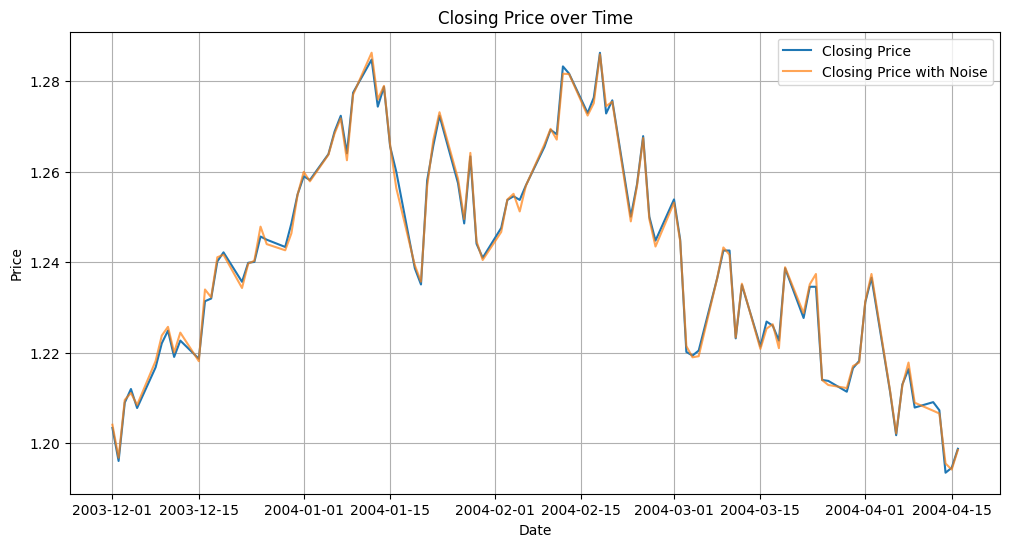

In [7]:
start_index = 0
num_rows = 100
df_subset = df.iloc[start_index:start_index + num_rows].copy()

plt.figure(figsize=(12, 6))
plt.plot(df_subset.index, df_subset['Close'], label='Closing Price')
plt.plot(df_subset.index, df_subset['Closing_Noise'], label='Closing Price with Noise', alpha=0.7)
plt.title('Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# 5 - Generating multiple randomly blurred Closing prices

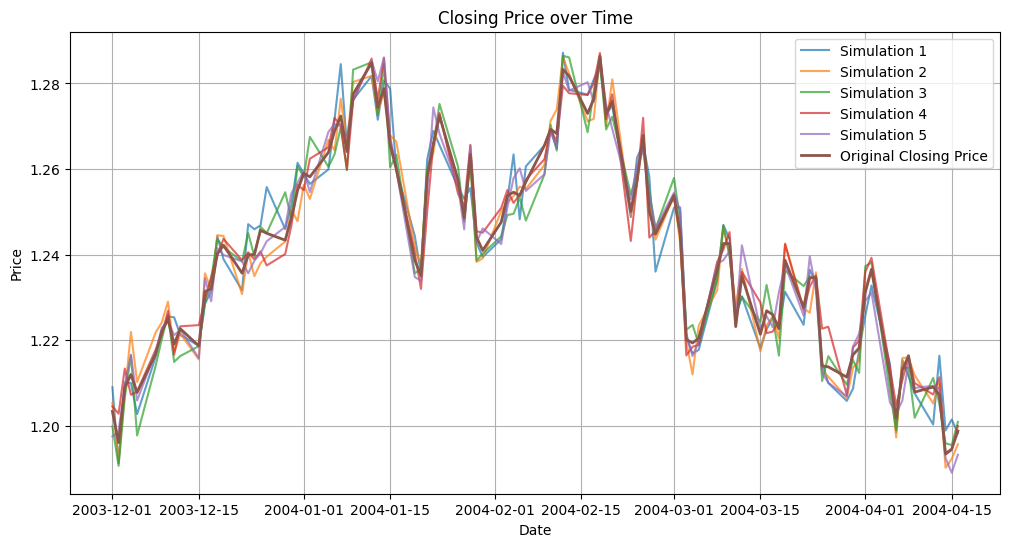

In [8]:
num_simulations = 5
start_index = 0
end_index = 100
df_subset = df.iloc[start_index:end_index].copy()

plt.figure(figsize=(12, 6))

for i in range(num_simulations):
    df_subset[f'Closing_Noise_{i}'] = np.random.normal(df_subset['Close'], df_subset['Close'] * 0.003, len(df_subset))
    plt.plot(df_subset.index, df_subset[f'Closing_Noise_{i}'], label=f'Simulation {i+1}', alpha=0.7)

plt.plot(df_subset.index, df_subset['Close'], label='Original Closing Price', linewidth=2)
plt.title('Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [9]:
for i in range(5):
    df[f'Closing_Noise_{i}'] = np.random.normal(df['Close'], df['Close'] * 0.003, len(df))

In [10]:
df

,Open,High,Low,Close,Volume,Closing_Noise,Closing_Noise_0,Closing_Noise_1,Closing_Noise_2,Closing_Noise_3,Closing_Noise_4
Date,,,,,,,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0,1.204109,1.208769,1.197437,1.198972,1.203417,1.204910
2003-12-02,1.208897,1.210903,1.194600,1.196101,0,1.196821,1.195563,1.191366,1.194975,1.195711,1.195438
2003-12-03,1.212298,1.213003,1.207700,1.209000,0,1.209591,1.205570,1.204468,1.214345,1.214784,1.204127
2003-12-04,1.208094,1.214403,1.204398,1.212004,0,1.211121,1.215819,1.209880,1.208824,1.207446,1.210324
2003-12-05,1.218695,1.219096,1.206593,1.207802,0,1.208478,1.203702,1.210405,1.207972,1.206567,1.205894
...,...,...,...,...,...,...,...,...,...,...,...
2026-02-03,1.179871,1.182452,1.178078,1.179913,0,1.182396,1.181179,1.177085,1.177989,1.188216,1.180878
2026-02-04,1.181614,1.183852,1.179231,1.181628,0,1.183574,1.184661,1.180707,1.181204,1.180144,1.188054
2026-02-05,1.180164,1.182047,1.178051,1.180233,0,1.178759,1.180215,1.181234,1.181764,1.180550,1.176064


# 6 - Visualizing generated slippage

In [11]:
df['Slippage'] = df['Close'] - df['Closing_Noise']
df

,Open,High,Low,Close,Volume,Closing_Noise,Closing_Noise_0,Closing_Noise_1,Closing_Noise_2,Closing_Noise_3,Closing_Noise_4,Slippage
Date,,,,,,,,,,,,
2003-12-01,1.196501,1.204007,1.194401,1.203398,0,1.204109,1.208769,1.197437,1.198972,1.203417,1.204910,-0.000710
2003-12-02,1.208897,1.210903,1.194600,1.196101,0,1.196821,1.195563,1.191366,1.194975,1.195711,1.195438,-0.000720
2003-12-03,1.212298,1.213003,1.207700,1.209000,0,1.209591,1.205570,1.204468,1.214345,1.214784,1.204127,-0.000591
2003-12-04,1.208094,1.214403,1.204398,1.212004,0,1.211121,1.215819,1.209880,1.208824,1.207446,1.210324,0.000882
2003-12-05,1.218695,1.219096,1.206593,1.207802,0,1.208478,1.203702,1.210405,1.207972,1.206567,1.205894,-0.000676
...,...,...,...,...,...,...,...,...,...,...,...,...
2026-02-03,1.179871,1.182452,1.178078,1.179913,0,1.182396,1.181179,1.177085,1.177989,1.188216,1.180878,-0.002483
2026-02-04,1.181614,1.183852,1.179231,1.181628,0,1.183574,1.184661,1.180707,1.181204,1.180144,1.188054,-0.001946
2026-02-05,1.180164,1.182047,1.178051,1.180233,0,1.178759,1.180215,1.181234,1.181764,1.180550,1.176064,0.001474


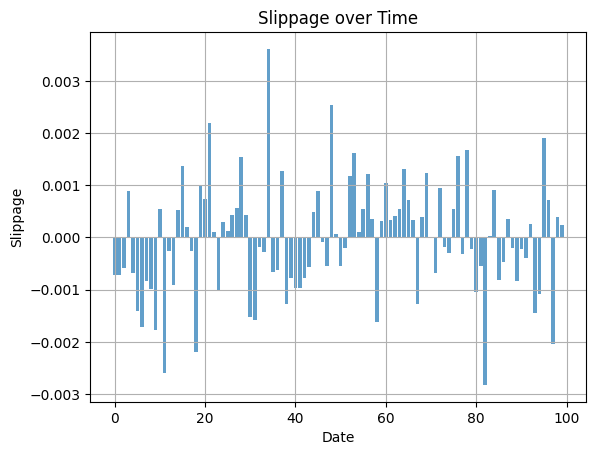

In [12]:
df_subset['Slippage'] = df_subset['Close'] - df_subset['Closing_Noise']
df_subset.reset_index(inplace=True)

plt.bar(df_subset.index, df_subset['Slippage'], width=0.8, alpha=0.7)
plt.title('Slippage over Time')
plt.xlabel('Date')
plt.ylabel('Slippage')
plt.grid()
plt.show()

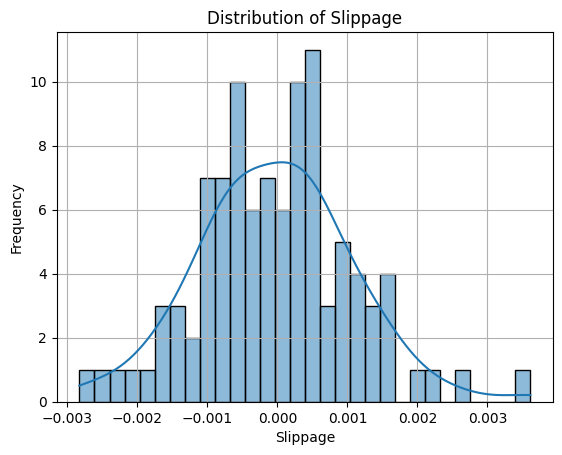

In [13]:
sns.histplot(df_subset['Slippage'], bins=30, kde=True)
plt.title('Distribution of Slippage')
plt.xlabel('Slippage')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# 7 - Generating slippage using Cauchy distribution

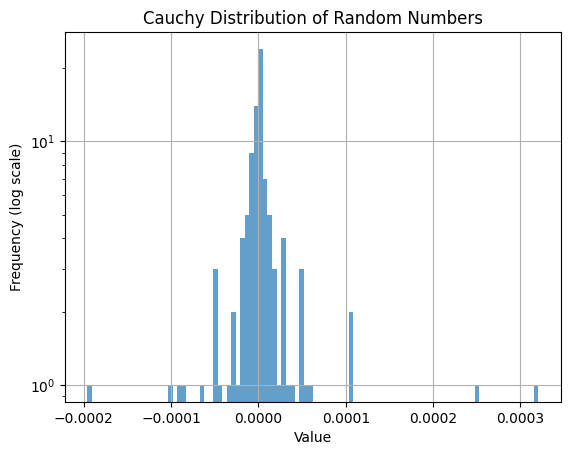

In [14]:
random_numbers = np.random.standard_cauchy(size=len(df_subset))*1e-5+0
random_numbers = np.clip(random_numbers, -5e-3, 5e-3)

plt.hist(random_numbers, bins=100, alpha=0.7)
plt.yscale('log')
plt.title('Cauchy Distribution of Random Numbers')
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.grid()
plt.show()

In [15]:
df_subset['Slippage'] = random_numbers
df_subset['Closing_Noise_Cauchy'] = df_subset['Close'] + df_subset['Slippage']

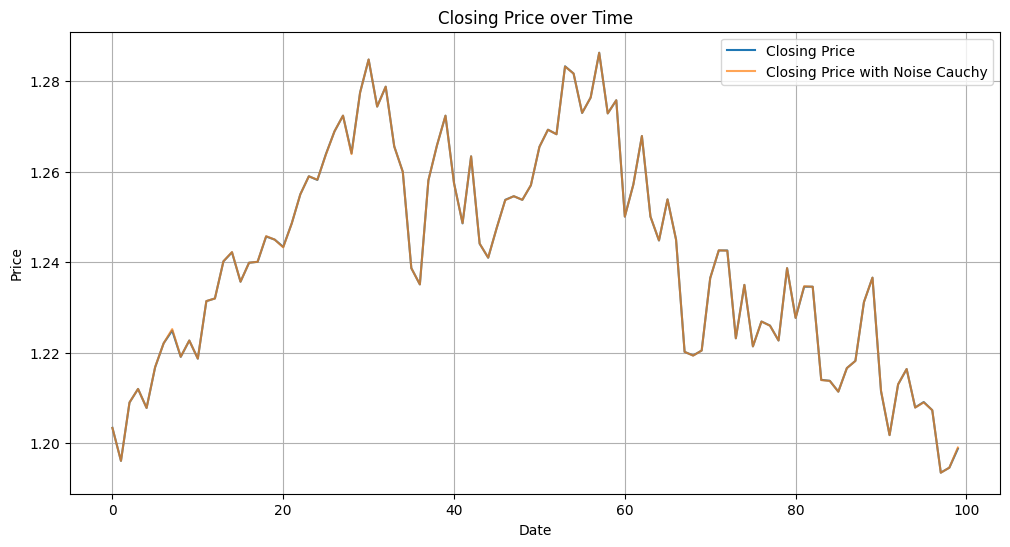

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df_subset.index, df_subset['Close'], label='Closing Price')
plt.plot(df_subset.index, df_subset['Closing_Noise_Cauchy'], label='Closing Price with Noise Cauchy', alpha=0.7)
plt.title('Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# 8 - Combining Cauchy and Normal Distributions to Generate Clusterd Slippage

In [17]:
df.reset_index(inplace=True)
df['Slippage_Trigger'] = 0

indices = df.index[df['Slippage'] > 1e-4]

for index in indices:
    start = max(0, index - 5)
    end = min(len(df), index + 5)
    df.loc[start:end, 'Slippage_Trigger'] = 1

df[df['Slippage_Trigger'] != 0]

,Date,Open,High,Low,Close,Volume,Closing_Noise,Closing_Noise_0,Closing_Noise_1,Closing_Noise_2,Closing_Noise_3,Closing_Noise_4,Slippage,Slippage_Trigger
0,2003-12-01,1.196501,1.204007,1.194401,1.203398,0,1.204109,1.208769,1.197437,1.198972,1.203417,1.204910,-0.000710,1
1,2003-12-02,1.208897,1.210903,1.194600,1.196101,0,1.196821,1.195563,1.191366,1.194975,1.195711,1.195438,-0.000720,1
2,2003-12-03,1.212298,1.213003,1.207700,1.209000,0,1.209591,1.205570,1.204468,1.214345,1.214784,1.204127,-0.000591,1
3,2003-12-04,1.208094,1.214403,1.204398,1.212004,0,1.211121,1.215819,1.209880,1.208824,1.207446,1.210324,0.000882,1
4,2003-12-05,1.218695,1.219096,1.206593,1.207802,0,1.208478,1.203702,1.210405,1.207972,1.206567,1.205894,-0.000676,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5752,2026-02-03,1.179871,1.182452,1.178078,1.179913,0,1.182396,1.181179,1.177085,1.177989,1.188216,1.180878,-0.002483,1
5753,2026-02-04,1.181614,1.183852,1.179231,1.181628,0,1.183574,1.184661,1.180707,1.181204,1.180144,1.188054,-0.001946,1
5754,2026-02-05,1.180164,1.182047,1.178051,1.180233,0,1.178759,1.180215,1.181234,1.181764,1.180550,1.176064,0.001474,1
5755,2026-02-06,1.177787,1.182648,1.176747,1.177745,0,1.178430,1.171579,1.177395,1.180687,1.183748,1.173111,-0.000684,1


In [25]:
df['Closing_Noise'] = df['Close'].where(df['Slippage_Trigger'] == 0, np.random.normal(df['Close'], 0.001))

In [26]:
df[df['Slippage_Trigger'] != 0]

,Date,Open,High,Low,Close,Volume,Closing_Noise,Closing_Noise_0,Closing_Noise_1,Closing_Noise_2,Closing_Noise_3,Closing_Noise_4,Slippage,Slippage_Trigger
0,2003-12-01,1.196501,1.204007,1.194401,1.203398,0,1.204057,1.208769,1.197437,1.198972,1.203417,1.204910,-0.000710,1
1,2003-12-02,1.208897,1.210903,1.194600,1.196101,0,1.195827,1.195563,1.191366,1.194975,1.195711,1.195438,-0.000720,1
2,2003-12-03,1.212298,1.213003,1.207700,1.209000,0,1.206948,1.205570,1.204468,1.214345,1.214784,1.204127,-0.000591,1
3,2003-12-04,1.208094,1.214403,1.204398,1.212004,0,1.210799,1.215819,1.209880,1.208824,1.207446,1.210324,0.000882,1
4,2003-12-05,1.218695,1.219096,1.206593,1.207802,0,1.205918,1.203702,1.210405,1.207972,1.206567,1.205894,-0.000676,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5752,2026-02-03,1.179871,1.182452,1.178078,1.179913,0,1.179764,1.181179,1.177085,1.177989,1.188216,1.180878,-0.002483,1
5753,2026-02-04,1.181614,1.183852,1.179231,1.181628,0,1.181996,1.184661,1.180707,1.181204,1.180144,1.188054,-0.001946,1
5754,2026-02-05,1.180164,1.182047,1.178051,1.180233,0,1.179141,1.180215,1.181234,1.181764,1.180550,1.176064,0.001474,1
5755,2026-02-06,1.177787,1.182648,1.176747,1.177745,0,1.178098,1.171579,1.177395,1.180687,1.183748,1.173111,-0.000684,1


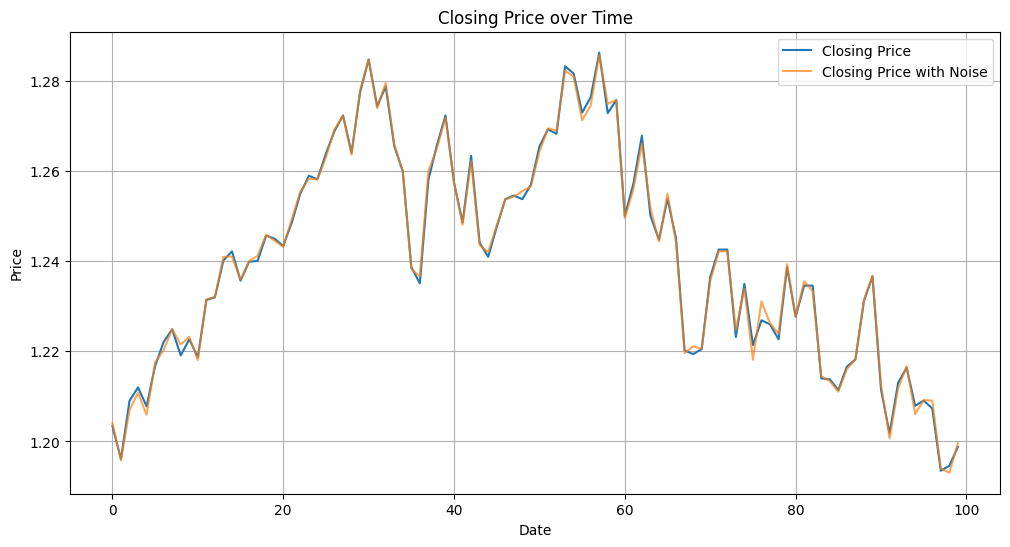

In [27]:
start_index = 0
num_rows = 100
df_subset = df.iloc[start_index:start_index + num_rows].copy()

plt.figure(figsize=(12, 6))
plt.plot(df_subset.index, df_subset['Close'], label='Closing Price')
plt.plot(df_subset.index, df_subset['Closing_Noise'], label='Closing Price with Noise', alpha=0.7)
plt.title('Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()